In [705]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans
from scipy.stats import normaltest, norm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import plotly.express as px
from sklearn.model_selection import train_test_split

sns.set_theme()


In [706]:
# Leitura do arquivo
df_fies_filipinas = pd.read_csv('fies_filipinas.csv')

In [707]:
df_fies_filipinas

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
0,480332,CAR,117848,Wage/Salaries,0,42140,38300,24676,16806,3325,...,1,1,0,0,0,2,1,0,0,1
1,198235,CAR,67766,Wage/Salaries,0,17329,13008,17434,11073,2035,...,0,1,0,0,0,3,1,0,0,2
2,82785,CAR,61609,Wage/Salaries,1,34182,32001,7783,2590,1730,...,0,0,0,0,0,0,0,0,0,0
3,107589,CAR,78189,Wage/Salaries,0,34030,28659,10914,10812,690,...,0,0,0,0,0,1,0,0,0,0
4,189322,CAR,94625,Wage/Salaries,0,34820,30167,18391,11309,1395,...,1,0,0,0,0,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1,23675,21542,1476,6120,1632,...,0,0,0,0,0,1,0,0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1,2691,1273,1886,4386,1840,...,0,0,0,0,0,3,0,0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,2,28646,27339,480,4796,1232,...,0,0,0,0,0,1,0,0,0,0
41542,129500,XII - SOCCSKSARGEN,81416,Enterpreneurial Activities,1,29996,26655,2359,17730,2923,...,0,0,0,0,0,2,0,0,0,0


In [708]:
# Analisando o data frame
df_fies_filipinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41544 entries, 0 to 41543
Data columns (total 60 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Total Household Income                         41544 non-null  int64 
 1   Region                                         41544 non-null  object
 2   Total Food Expenditure                         41544 non-null  int64 
 3   Main Source of Income                          41544 non-null  object
 4   Agricultural Household indicator               41544 non-null  int64 
 5   Bread and Cereals Expenditure                  41544 non-null  int64 
 6   Total Rice Expenditure                         41544 non-null  int64 
 7   Meat Expenditure                               41544 non-null  int64 
 8   Total Fish and  marine products Expenditure    41544 non-null  int64 
 9   Fruit Expenditure                              41544 non-null

In [709]:
df_fies_filipinas.isnull().sum().sort_values(ascending=False)

Household Head Occupation                        7536
Household Head Class of Worker                   7536
Number of Motorized Banca                           0
Number of Stove with Oven/Gas Range                 0
Type of Household                                   0
Total Number of Family members                      0
Members with age less than 5 year old               0
Members with age 5 - 17 years old                   0
Total number of family members employed             0
Type of Building/House                              0
Type of Roof                                        0
Type of Walls                                       0
House Floor Area                                    0
House Age                                           0
Number of bedrooms                                  0
Tenure Status                                       0
Toilet Facilities                                   0
Region                                              0
Main Source of Water Supply 

In [710]:
# Eliminando as linhas que contem NA
df_fies_filipinas.dropna(inplace=True)


Text(0.0, 1.0, 'Quantidade de pessoas por região')

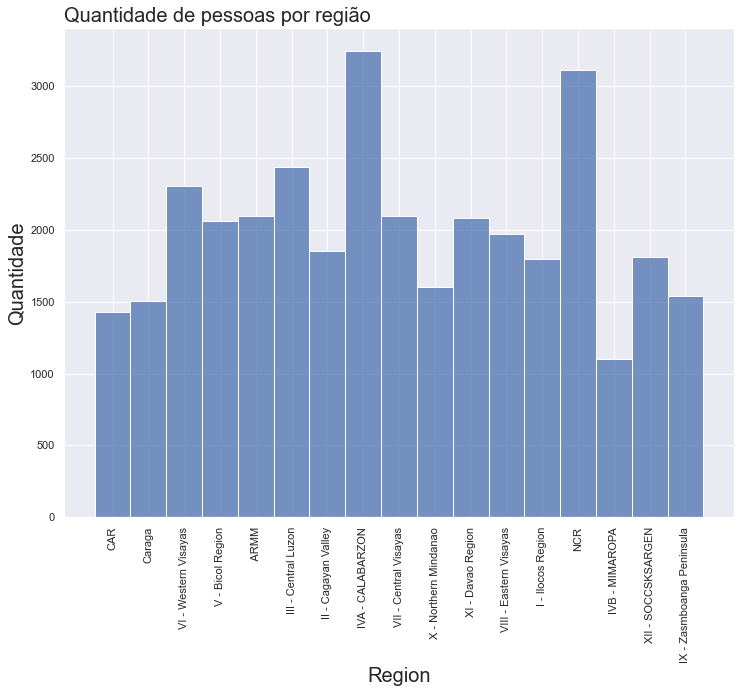

In [711]:
# Gráfico de distribuição das pessoas por região
plt.figure(figsize=(12, 9))
sns.histplot(df_fies_filipinas, x='Region')
plt.xticks(rotation=90);
plt.xlabel('Region', size=20)
plt.ylabel('Quantidade', size=20)
plt.title('Quantidade de pessoas por região',size=20, loc='left')

In [712]:
# Calculando a renda média por região
mean_Total_Household_Income = df_fies_filipinas.groupby('Region')['Total Household Income'].mean()
mean_Total_Household_Income


Region
 ARMM                        134839.134670
CAR                          263413.423669
Caraga                       190708.342420
I - Ilocos Region            231150.571031
II - Cagayan Valley          241799.533981
III - Central Luzon          291008.516235
IVA - CALABARZON             292757.304509
IVB - MIMAROPA               214955.088849
IX - Zasmboanga Peninsula    185493.859831
NCR                          410717.844645
V - Bicol Region             183400.827754
VI - Western Visayas         215086.098567
VII - Central Visayas        227225.086998
VIII - Eastern Visayas       193964.715302
X - Northern Mindanao        206978.858573
XI - Davao Region            229382.560096
XII - SOCCSKSARGEN           182147.592920
Name: Total Household Income, dtype: float64

In [713]:
# Criando uma tabela com a renda total e média por região
df_fies_filipinas_income_sum_region = df_fies_filipinas.groupby('Region')[['Total Household Income']].sum().reset_index().sort_values(by='Total Household Income', ascending=False)
df_fies_filipinas_income_sum_region['Mean Household Income'] = mean_Total_Household_Income.values.round()
df_fies_filipinas_income_sum_region

,Region,Total Household Income,Mean Household Income
9,NCR,1276921779,134839.0
6,IVA - CALABARZON,947948152,263413.0
5,III - Central Luzon,708023720,190708.0
11,VI - Western Visayas,495343285,231151.0
15,XI - Davao Region,477115725,241800.0
12,VII - Central Visayas,475354882,291009.0
4,II - Cagayan Valley,448296336,292757.0
3,I - Ilocos Region,414915275,214955.0
13,VIII - Eastern Visayas,381528595,185494.0
10,V - Bicol Region,377989106,410718.0


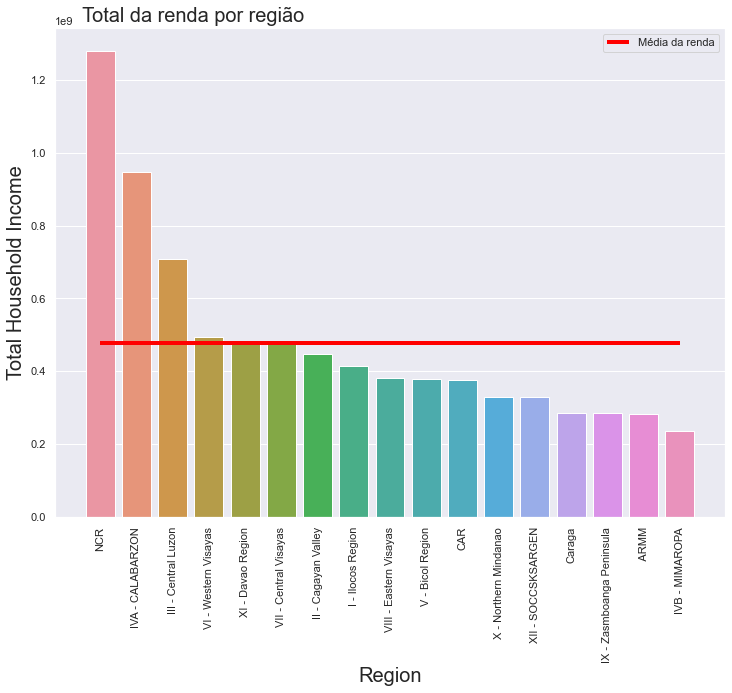

In [714]:
# Gráfico - Total da renda por região
plt.figure(figsize=(12, 9))
sns.barplot(data=df_fies_filipinas_income_sum_region, x='Region', y='Total Household Income')
plt.hlines(df_fies_filipinas_income_sum_region['Total Household Income'].mean(), 0, 16, linewidth=4, linestyle='-', color='red', label='Média da renda')
plt.xlabel('Region', size=20)
plt.ylabel('Total Household Income', size=20)
plt.xticks(rotation=90)
plt.legend()
plt.title('     Total da renda por região', size=20, loc='left');

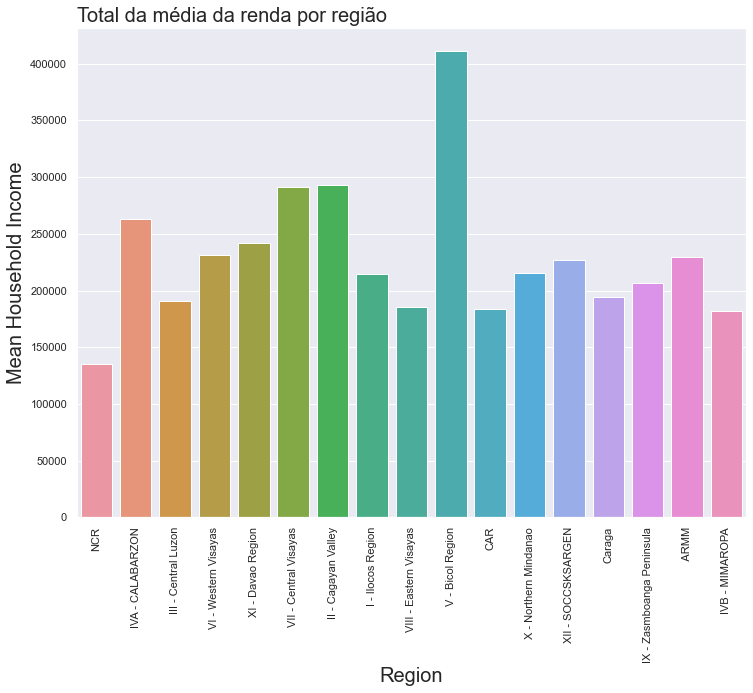

In [715]:
# Gráfico - Total da média da renda por região
plt.figure(figsize=(12, 9))
sns.barplot(data=df_fies_filipinas_income_sum_region, x='Region', y='Mean Household Income')
plt.xlabel('Region', size=20)
plt.ylabel('Mean Household Income', size=20)
plt.xticks(rotation=90)
plt.title('Total da média da renda por região', size=20, loc='left');

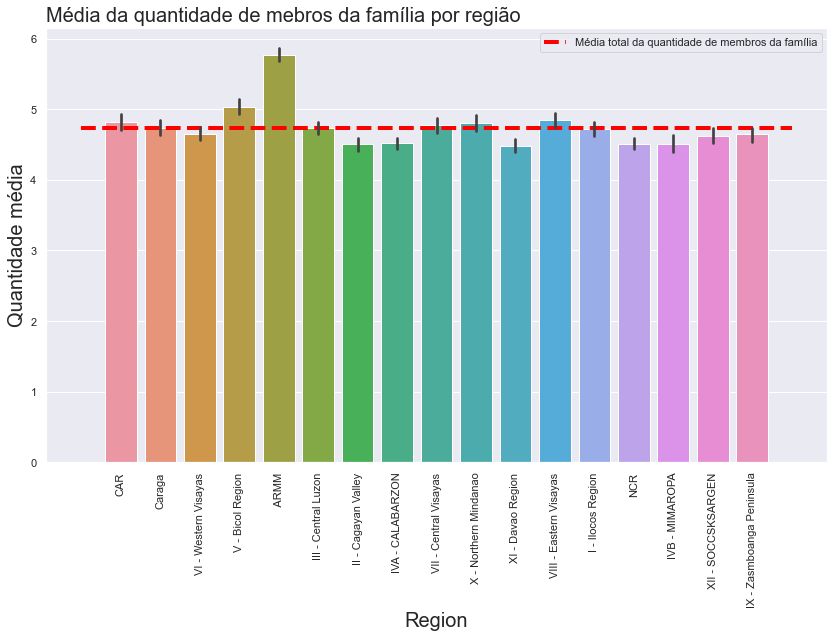

In [716]:
# Gráfico - Média da quantidade de membros da família por região
plt.figure(figsize=(14, 8))
sns.barplot(data=df_fies_filipinas, x='Region', y='Total Number of Family members')
plt.hlines(df_fies_filipinas['Total Number of Family members'].mean(), -1, 17, linewidth=4, linestyle='--', color='red', label='Média total da quantidade de membros da família')
plt.xticks(rotation=90);
plt.xlabel('Region', size=20)
plt.ylabel('Quantidade média', size=20)
plt.legend()
plt.title('Média da quantidade de mebros da família por região', size=20, loc='left');

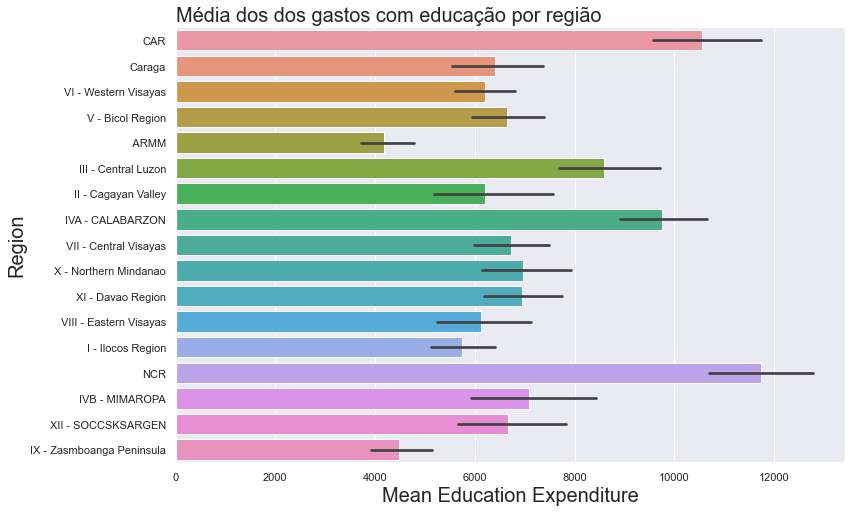

In [717]:
# Gráfico - Média dos gastos com educação por região
plt.figure(figsize=(12, 8))
sns.barplot(data=df_fies_filipinas, x='Education Expenditure', y='Region', orient='h')
plt.ylabel('Region', size=20)
plt.xlabel('Mean Education Expenditure', size=20)

plt.title('Média dos dos gastos com educação por região', size=20, loc='left');

##### Milestone 1 - Amostra e Descrição

1 - Calcule o tamanho de amostra ideal, considerando que você deseja estimar a média de dinheiro gasto com saúde (Medical Care Expenditure) com um erro máximo de 500, e um nível de confiança de 95%

In [718]:
df_fies_filipinas['Medical Care Expenditure']

0        3457
1        3520
2          70
3          60
4         140
         ... 
41538    3701
41539     294
41540     890
41541     540
41542     314
Name: Medical Care Expenditure, Length: 34008, dtype: int64

In [719]:
# Calculando o desvio padrão
sigma = df_fies_filipinas['Medical Care Expenditure'].std()
sigma

22236.13189907766

In [720]:
error_max = 500

In [721]:
significancia = 0.05
confianca = 0.95

In [722]:
z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

In [723]:
# Tamanho da amostra
n_min = (z_alpha_2 * sigma / error_max)**2
n_min = round(n_min)
n_min

7598

2 - Obtenha uma amostra do dataset, considerando o tamanho da amostra que você calculou anteriormente e, em seguida, faça uma análise descritiva dos dados com, pelo menos, 10 variáveis quantitativas.

In [724]:
# Criando a amostra
df_fies_filipinas_sample = df_fies_filipinas.sample(n_min, random_state=101)
df_fies_filipinas_sample

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
19177,101844,VIII - Eastern Visayas,60933,Other sources of Income,0,28832,27108,5245,4596,2760,...,0,0,0,0,0,0,0,0,0,0
28759,157850,I - Ilocos Region,42011,Wage/Salaries,1,12345,10257,6526,6248,1555,...,0,0,0,0,0,2,0,0,0,0
38336,215349,NCR,96025,Wage/Salaries,2,16602,7696,9590,9638,2790,...,0,1,0,0,0,1,0,0,0,0
19981,103251,ARMM,68570,Enterpreneurial Activities,1,37450,32580,1870,9570,1345,...,0,0,0,0,0,1,0,0,0,0
9646,528199,VII - Central Visayas,136722,Enterpreneurial Activities,0,20452,12324,1903,8482,1583,...,1,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13519,152271,I - Ilocos Region,42760,Wage/Salaries,0,2423,1305,1840,1248,380,...,0,0,0,0,0,1,1,0,0,1
26447,85247,IVB - MIMAROPA,41793,Wage/Salaries,0,16856,15400,5230,3835,1360,...,0,0,0,0,0,2,0,0,0,0
6854,482370,V - Bicol Region,129366,Wage/Salaries,0,30131,23860,18112,9088,3435,...,1,1,0,0,0,3,3,1,0,0
15935,117200,II - Cagayan Valley,58828,Wage/Salaries,0,18486,15100,8963,12279,1421,...,0,0,0,0,0,1,0,0,0,0


In [725]:
# Analisando a variável quantitativa Total Household Income
df_fies_filipinas_sample[['Total Household Income']].describe().round()

,Total Household Income
count,7598.0
mean,237140.0
std,274273.0
min,14232.0
25%,103655.0
50%,159548.0
75%,275946.0
max,11815988.0


In [726]:
# Criando tabela de distribuição de frequencia da variável quantitativa Total Household Income
df_fies_filipinas_total_household_income = pd.cut(df_fies_filipinas_sample['Total Household Income'], 
                                            bins=[df_fies_filipinas_sample['Total Household Income'].min() ,100000, 200000,
                                            df_fies_filipinas_sample['Total Household Income'].max()],
                                            labels=['Low', 'Medium', 'High'], include_lowest=True)
df_fies_filipinas_total_household_income
# Low -  até 100000
# Medium - até 200000
# High - acima de 200000

19177    Medium
28759    Medium
38336      High
19981    Medium
9646       High
          ...  
13519    Medium
26447       Low
6854       High
15935    Medium
36406      High
Name: Total Household Income, Length: 7598, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [727]:
# Frequência absoluta
fi = df_fies_filipinas_total_household_income.value_counts()
fi

Medium    2932
High      2911
Low       1755
Name: Total Household Income, dtype: int64

In [728]:
# Frequência percentual
fp = df_fies_filipinas_total_household_income.value_counts(normalize=True) * 100
fp

Medium    38.589102
High      38.312714
Low       23.098184
Name: Total Household Income, dtype: float64

In [729]:
# Tabela de distribuição de frequência
tab_total_household_income = pd.DataFrame({'Frequência absoluta': fi, 'Frequência percentual %': round(fp)})
tab_total_household_income

,Frequência absoluta,Frequência percentual %
Medium,2932,39.0
High,2911,38.0
Low,1755,23.0


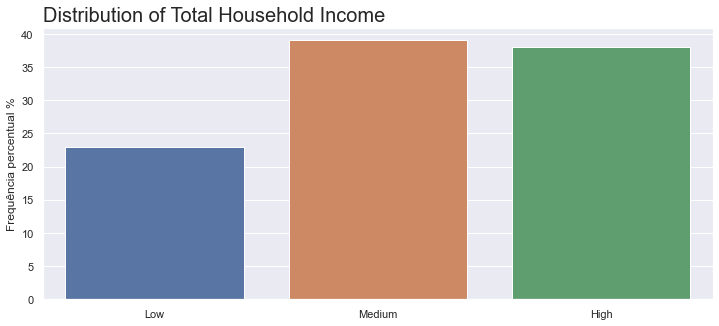

In [730]:
# Criando o gráfico de distribuição - classificando a renda (Low, Medium, High) 
plt.figure(figsize=(12,5))
sns.barplot(x= tab_total_household_income.index, y=tab_total_household_income['Frequência percentual %'])
plt.title('Distribution of Total Household Income', size=20, loc='left');
# Low -  até 100000
# Medium - até 200000
# High - acima de 200000

In [731]:
# Analisando a variável quantitativa Total Food Expenditure
df_fies_filipinas_sample[['Total Food Expenditure']].describe().round()

,Total Food Expenditure
count,7598.0
mean,84171.0
std,50178.0
min,5638.0
25%,50987.0
50%,71810.0
75%,104370.0
max,667876.0


In [732]:
# Criando tabela de distribuição de frequencia da variável quantitativa Total Food Expenditure
df_fies_filipinas_total_food_expenditure = pd.cut(df_fies_filipinas_sample['Total Food Expenditure'], 
                                            bins=[df_fies_filipinas_sample['Total Food Expenditure'].min() ,100000, 200000,
                                            df_fies_filipinas_sample['Total Food Expenditure'].max()],
                                            labels=['Low', 'Medium', 'High'], include_lowest=True)
df_fies_filipinas_total_food_expenditure
# Low -  até 100000
# Medium - até 200000
# High - acima de 200000

19177       Low
28759       Low
38336       Low
19981       Low
9646     Medium
          ...  
13519       Low
26447       Low
6854     Medium
15935       Low
36406    Medium
Name: Total Food Expenditure, Length: 7598, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [733]:
# Frequência absoluta
fi = df_fies_filipinas_total_food_expenditure.value_counts()
fi

Low       5513
Medium    1843
High       242
Name: Total Food Expenditure, dtype: int64

In [734]:
# Frequência percentual
fp = df_fies_filipinas_total_food_expenditure.value_counts(normalize=True) * 100
fp


Low       72.558568
Medium    24.256383
High       3.185049
Name: Total Food Expenditure, dtype: float64

In [735]:
# Tabela de distribuição de frequência
tab_total_food_expenditure = pd.DataFrame({'Frequência absoluta' : fi, 'Frequência relativa (%)' : round(fp)})
tab_total_food_expenditure

,Frequência absoluta,Frequência relativa (%)
Low,5513,73.0
Medium,1843,24.0
High,242,3.0


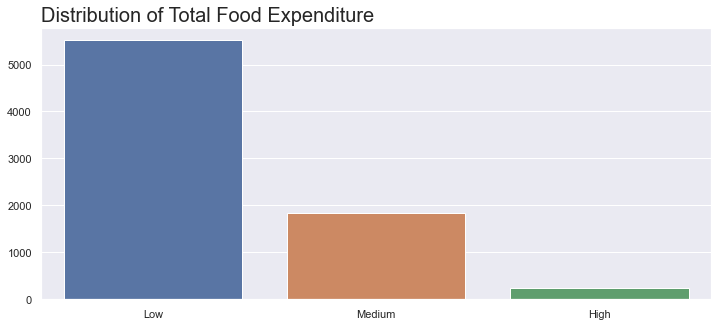

In [736]:
# Criando o gráfico de distribuição - classificando os gastos como (Low, Medium, High) 
plt.figure(figsize=(12,5))
sns.barplot(x= fi.index, y= fi.values)
plt.title('Distribution of Total Food Expenditure', size=20, loc='left');
# Low -  até 100000
# Medium - até 200000
# High - acima de 200000


In [737]:
# Analisando a variável quantitativa Bread and Cereals Expenditure
df_fies_filipinas_sample[['Bread and Cereals Expenditure']].describe().round()

,Bread and Cereals Expenditure
count,7598.0
mean,25398.0
std,12496.0
min,0.0
25%,16986.0
50%,23481.0
75%,31545.0
max,195187.0


In [738]:
# Criando tabela de distribuição de frequencia da variável quantitativa Bread and Cereals Expenditure
df_fies_filipinas_bread_cereals_expenditure = pd.cut(df_fies_filipinas_sample['Bread and Cereals Expenditure'], 
                                            bins=[df_fies_filipinas_sample['Bread and Cereals Expenditure'].min() ,25000, 30000,
                                            df_fies_filipinas_sample['Bread and Cereals Expenditure'].max()],
                                            labels=['Low', 'Medium', 'High'], include_lowest=True)
df_fies_filipinas_bread_cereals_expenditure

19177    Medium
28759       Low
38336       Low
19981      High
9646        Low
          ...  
13519       Low
26447       Low
6854       High
15935       Low
36406      High
Name: Bread and Cereals Expenditure, Length: 7598, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [739]:
# Frequência absoluta
fi = df_fies_filipinas_bread_cereals_expenditure.value_counts()
fi

Low       4288
High      2201
Medium    1109
Name: Bread and Cereals Expenditure, dtype: int64

In [740]:
# Frequência percentual
fp = df_fies_filipinas_bread_cereals_expenditure.value_counts(normalize=True) * 100
fp

Low       56.435904
High      28.968150
Medium    14.595946
Name: Bread and Cereals Expenditure, dtype: float64

In [741]:
# Tabela de distribuição de frequência
tab_bread_cereals_expenditure= pd.DataFrame({'Frequência absoluta' : fi, 'Frequência relativa (%)' : round(fp)})
tab_bread_cereals_expenditure

,Frequência absoluta,Frequência relativa (%)
Low,4288,56.0
High,2201,29.0
Medium,1109,15.0


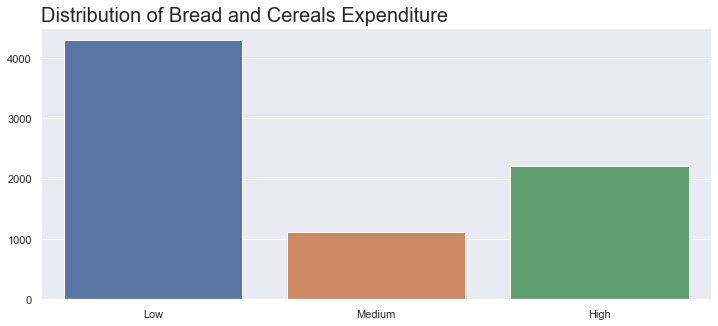

In [742]:
# Criando o gráfico de distribuição - classificando os gastos como (Low, Medium, High) 
plt.figure(figsize=(12,5))
sns.barplot(x= fi.index, y= fi.values)
plt.title('Distribution of Bread and Cereals Expenditure', size=20, loc='left');

Milestone 2 - Inferência Estatística

1 -Utilizando um nível de confiança de 95%, calcule o intervalo de confiança do dinheiro gasto com saúde e educação (colunas: Medical Care Expenditure e Education Expenditure).

In [743]:
# Medical Care Expenditure - Retirando uma amostra de tamanho 1000
df_fies_filipinas_sample = df_fies_filipinas.sample(1000)

In [744]:
df_fies_filipinas_sample['Medical Care Expenditure']

9669     7327
6193      130
5547     5770
24254     120
34408    5330
         ... 
21537    1865
8212      210
11167      75
9302     1396
14190     132
Name: Medical Care Expenditure, Length: 1000, dtype: int64

In [745]:
media_amostral = df_fies_filipinas_sample['Medical Care Expenditure'].mean()
media_amostral

4794.101

In [746]:
n = len(df_fies_filipinas_sample)
sigma = df_fies_filipinas_sample['Medical Care Expenditure'].std()
sigma

12968.991930465972

In [747]:
significancia = 0.05
confianca = 0.95

In [748]:
z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

In [749]:
erro = z_alpha_2 * (sigma / np.sqrt(n))
erro

803.8116772500756

In [750]:
# Intervalo de confiança
(media_amostral - erro, media_amostral + erro)

(3990.289322749924, 5597.912677250075)

In [751]:
# Intervalo de confiança
norm.interval(confianca, loc=media_amostral, scale=sigma / np.sqrt(n))

(3990.289322749924, 5597.912677250075)

In [752]:
# Education Expenditure
df_fies_filipinas_sample['Education Expenditure']

9669      820
6193     1020
5547     1420
24254       0
34408     460
         ... 
21537    2085
8212        0
11167    1050
9302        0
14190    2630
Name: Education Expenditure, Length: 1000, dtype: int64

In [753]:
n = len(df_fies_filipinas_sample)

In [754]:
media_amostral = df_fies_filipinas_sample['Education Expenditure'].mean()
media_amostral

6801.98

In [755]:
sigma = df_fies_filipinas_sample['Education Expenditure'].std()
sigma

17645.960842006807

In [756]:
significancia = 0.05
confianca = 0.95

In [757]:
z_alpha_2 = norm.ppf(confianca + significancia / 2)
z_alpha_2

1.959963984540054

In [758]:
erro = z_alpha_2 * sigma / np.sqrt(n) 
erro

1093.6878870116639

In [759]:
# Intervalo de confiança
(media_amostral - erro, media_amostral + erro)

(5708.292112988336, 7895.667887011663)

In [760]:
# Intervalo de confiança
norm.interval(confianca, loc=media_amostral, scale=sigma / np.sqrt(n))

(5708.292112988336, 7895.667887011663)

2 - Calcule se há diferença de média de número total de membros da família pelo sexo do chefe de família (Household Head Sex e Total Number of Family members) com 95% de confiança.

In [761]:
# Retirando uma amostra de tamanho 1000 - female
df_fies_filipinas_sample_female = df_fies_filipinas[df_fies_filipinas['Household Head Sex'] == 'Female'].sample(1000)
df_fies_filipinas_sample_female

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
14831,767500,VI - Western Visayas,120239,Other sources of Income,0,14536,1093,41256,14702,5688,...,1,1,1,0,0,3,1,1,0,1
24087,79450,VII - Central Visayas,48761,Enterpreneurial Activities,1,19440,16096,2378,16596,670,...,0,0,0,0,0,0,0,0,0,0
5538,436545,III - Central Luzon,63346,Wage/Salaries,0,6680,1340,2550,2170,1175,...,1,0,0,0,0,2,2,0,0,0
4304,130524,VII - Central Visayas,55012,Other sources of Income,0,13843,10800,4193,5802,1015,...,0,0,0,0,0,0,0,0,0,0
33906,218460,Caraga,29083,Other sources of Income,0,9780,6300,1622,2694,2670,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33100,67100,ARMM,30164,Enterpreneurial Activities,0,5459,1561,326,10123,905,...,0,0,0,0,0,0,0,0,0,0
31047,96567,VIII - Eastern Visayas,64407,Other sources of Income,0,32472,30194,3480,9840,2060,...,0,0,0,0,0,1,0,0,0,0
34377,185502,Caraga,41115,Other sources of Income,0,12589,10890,3810,5148,1795,...,1,0,0,0,0,2,1,0,0,0
30339,689560,IVA - CALABARZON,183607,Other sources of Income,0,26469,14125,30526,11096,8548,...,1,1,1,1,0,4,0,1,0,0


In [762]:
# Retirando uma amostra de tamanho 1000 - Male
df_fies_filipinas_sample_male = df_fies_filipinas[df_fies_filipinas['Household Head Sex'] == 'Male'].sample(1000)
df_fies_filipinas_sample_male

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
3992,279550,CAR,91890,Enterpreneurial Activities,1,26232,18120,22900,7464,10270,...,0,1,0,0,0,1,0,0,0,0
18712,78123,VIII - Eastern Visayas,39586,Enterpreneurial Activities,0,21682,17404,3708,5137,210,...,0,0,0,0,0,0,0,0,0,0
13556,218339,I - Ilocos Region,99564,Wage/Salaries,0,27541,21538,14548,8768,4950,...,1,0,0,0,0,3,1,0,0,1
18636,83660,ARMM,45352,Enterpreneurial Activities,1,28980,26700,770,3288,1015,...,0,0,0,0,0,1,0,0,0,0
15772,272693,II - Cagayan Valley,55679,Enterpreneurial Activities,1,12496,9040,15867,9286,715,...,1,1,0,0,0,1,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,213991,VII - Central Visayas,108836,Wage/Salaries,0,34577,24256,12942,12852,1400,...,0,0,0,0,0,1,0,0,0,0
34927,198480,ARMM,75364,Enterpreneurial Activities,1,29856,23363,2261,21652,1855,...,0,0,0,0,0,1,0,0,1,0
3169,211110,IVA - CALABARZON,51238,Other sources of Income,0,21717,16480,4680,10268,660,...,0,1,0,0,0,0,0,0,0,0
34309,308450,Caraga,68039,Wage/Salaries,0,33993,29860,4018,7852,1070,...,1,1,0,0,0,4,1,0,0,0


In [763]:
df_fies_filipinas_sample_male.shape, df_fies_filipinas_sample_female.shape

((1000, 60), (1000, 60))

### Formulação das hipóteses

### $\mu_1 \Rightarrow$ Média do número total de membros da família (Household Head Sex - Female)
### $\mu_2 \Rightarrow$ Média do número total de membros da família (Household Head Sex - Male)

##### $
\begin{cases}
H_0: \mu_1 \ = \mu_2\\
H_1: \mu_1 \neq \mu_2
\end{cases}

In [764]:
# Teste para duas amostras usando o CompareMeans
test_female = DescrStatsW(df_fies_filipinas_sample_female['Total Number of Family members'])

In [765]:
test_male = DescrStatsW(df_fies_filipinas_sample_male['Total Number of Family members'])

In [766]:
test = CompareMeans(test_female, test_male)

In [767]:
# P_value menor 0.05 - Rejeitar hipótese nula
test.ztest_ind()

(-11.284798325172712, 1.5599895202648836e-29)

##### Rejeitamos a hipótese nula e aceitamos a hipótese alternativa

##### Podemos afirmar com 95% de change de estamarmos corretos que há diferença entre as médias 

3 - Verifique se há diferença de média total de renda da família (Total Household Income) de acordo com a fonte salarial (Main Source of Income).

In [768]:
df_fies_filipinas['Main Source of Income'].unique()

array(['Wage/Salaries', 'Other sources of Income',
       'Enterpreneurial Activities'], dtype=object)

In [769]:
# Filtrando a coluna 'Main Source of Income' apenas com a informação 'Wage/Salaries'
df_fies_filipinas_sample_wage_salaries = df_fies_filipinas[df_fies_filipinas['Main Source of Income'] == 'Wage/Salaries']

# retirando uma amostra de 10000
df_fies_filipinas_sample_wage_salaries.sample(10000, random_state=101)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
8597,249902,IVA - CALABARZON,59890,Wage/Salaries,0,14437,12220,11280,7666,1777,...,1,1,0,0,0,2,1,0,0,0
22333,569622,X - Northern Mindanao,110341,Wage/Salaries,0,38150,27900,16272,12632,1503,...,1,1,0,0,0,3,2,0,0,1
19432,792460,VIII - Eastern Visayas,232817,Wage/Salaries,0,37086,26400,59894,58024,4740,...,1,1,1,0,0,7,1,1,0,1
40771,254198,CAR,72601,Wage/Salaries,2,24048,17862,12210,8032,1620,...,0,0,0,0,0,2,0,0,0,1
23315,157166,VI - Western Visayas,81522,Wage/Salaries,0,41519,36270,5721,11436,2195,...,1,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36928,278800,NCR,119648,Wage/Salaries,2,17225,12792,4612,780,2160,...,1,1,0,0,0,3,1,0,0,0
16928,305887,IVA - CALABARZON,136926,Wage/Salaries,0,52734,43440,9126,12144,1175,...,1,0,0,0,0,3,0,0,0,0
39122,695070,NCR,152282,Wage/Salaries,2,43583,21128,14247,9052,3458,...,1,1,0,0,0,5,0,0,0,0
39901,1454000,NCR,252278,Wage/Salaries,2,3790,0,0,1224,740,...,1,1,2,1,0,2,1,0,0,0


In [770]:
# Filtrando a coluna 'Main Source of Income' apenas com as informações 'Other sources of Income' e 'Enterpreneurial Activities'.
df_fies_filipinas_sample_others = df_fies_filipinas[(df_fies_filipinas['Main Source of Income'] == 'Other sources of Income')
                                  | (df_fies_filipinas['Main Source of Income'] == 'Enterpreneurial Activities')]

# Retirando uma amostra de 10000
df_fies_filipinas_sample_others.sample(10000, random_state=101)

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Agricultural Household indicator,Bread and Cereals Expenditure,Total Rice Expenditure,Meat Expenditure,Total Fish and marine products Expenditure,Fruit Expenditure,...,Number of Refrigerator/Freezer,Number of Washing Machine,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Landline/wireless telephones,Number of Cellular phone,Number of Personal Computer,Number of Stove with Oven/Gas Range,Number of Motorized Banca,Number of Motorcycle/Tricycle
41261,49532,IX - Zasmboanga Peninsula,21868,Enterpreneurial Activities,1,9800,0,616,4136,1345,...,0,0,0,0,0,0,0,0,0,0
7046,51225,V - Bicol Region,30094,Other sources of Income,0,14427,14050,2200,5435,819,...,0,0,0,0,0,1,0,0,0,1
18183,54965,ARMM,38037,Enterpreneurial Activities,1,14617,10950,1276,7230,1165,...,0,0,0,0,0,0,0,0,0,0
6962,86113,V - Bicol Region,51141,Enterpreneurial Activities,1,17474,15600,4332,11184,1845,...,0,0,0,0,0,2,0,0,0,0
33439,155555,ARMM,75174,Enterpreneurial Activities,1,28990,23452,0,30792,2640,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20533,184590,NCR,44355,Enterpreneurial Activities,0,7768,5074,3781,5808,1640,...,1,1,0,0,0,1,1,0,0,0
26233,146069,IVB - MIMAROPA,35314,Other sources of Income,0,20106,17262,1780,4015,1460,...,0,0,0,0,0,2,0,0,0,0
20459,118193,ARMM,53560,Enterpreneurial Activities,1,24766,18284,2379,9597,1500,...,0,0,0,0,0,2,0,0,0,0
16575,56826,I - Ilocos Region,52637,Enterpreneurial Activities,1,30509,28714,2395,4288,1090,...,0,0,0,0,0,2,0,0,0,0


### Formulação das hipóteses
### $\mu_1 \Rightarrow$ Média do número total da renda da família ('Wage/Salaries')
### $\mu_2 \Rightarrow$ Média do número total da renda da família ('Other sources of Income' and 'Enterpreneurial Activities')

##### $
\begin{cases}
H_0: \mu_1 \ = \mu_2\\
H_1: \mu_1 \neq \mu_2
\end{cases}

In [771]:
# Teste para duas amostraras usando o CompareMeans
test_wage_salaries = DescrStatsW(df_fies_filipinas_sample_wage_salaries['Total Household Income'])

In [772]:
test_others = DescrStatsW(df_fies_filipinas_sample_others['Total Household Income'])

In [773]:
test = CompareMeans(test_wage_salaries, test_others)

In [774]:
# P_value menor 0.05 - Rejeitar hipótese nula
test.ztest_ind(value=0)

(12.827444684469903, 1.150980038785326e-37)

##### Rejeitamos a hipótese nula e aceitamos a hipótese alternativa

##### Podemos afirmar com 95% de change de estamarmos corretos que há diferença entre as médias 

##### Milestone 3 - Previsão de Renda Com Regressão Linear

Usando Regressão Linear, crie um modelo de previsão de renda de forma a minimizar o erro. Considere 70% dos dados para treinar o modelo, e 30% para testá-lo. Por fim, utilize as métricas de avaliação do modelo que foram estudadas para validá-lo.

In [775]:
# Verificando a correlação das variáveis 
df_fies_filipinas_corr = df_fies_filipinas.corr()
df_fies_filipinas_corr = df_fies_filipinas_corr['Total Household Income']

# Filtrando apenas as variáveis que possuem forte correlação com a variável 'Total Household Income'
df_fies_filipinas_high_corr = df_fies_filipinas_corr[df_fies_filipinas_corr > 0.5]
df_fies_filipinas_high_corr

Total Household Income                           1.000000
Total Food Expenditure                           0.657479
Meat Expenditure                                 0.560620
Clothing, Footwear and Other Wear Expenditure    0.614648
Housing and water Expenditure                    0.671536
Imputed House Rental Value                       0.570732
Transportation Expenditure                       0.644419
Communication Expenditure                        0.711834
Miscellaneous Goods and Services Expenditure     0.666605
Total Income from Entrepreneurial Acitivites     0.612427
Number of Airconditioner                         0.563487
Number of Car, Jeep, Van                         0.557558
Number of Personal Computer                      0.556465
Name: Total Household Income, dtype: float64

In [776]:
# Criando uma lista com as colunas com baixa correlação
df_fies_filipinas_low_corr = df_fies_filipinas_corr[df_fies_filipinas_corr < 0.5]
list_columns_drop_low_corr = list(df_fies_filipinas_low_corr.index)
list_columns_drop_low_corr

['Agricultural Household indicator',
 'Bread and Cereals Expenditure',
 'Total Rice Expenditure',
 'Total Fish and  marine products Expenditure',
 'Fruit Expenditure',
 'Vegetables Expenditure',
 'Restaurant and hotels Expenditure',
 'Alcoholic Beverages Expenditure',
 'Tobacco Expenditure',
 'Medical Care Expenditure',
 'Education Expenditure',
 'Special Occasions Expenditure',
 'Crop Farming and Gardening expenses',
 'Household Head Age',
 'Total Number of Family members',
 'Members with age less than 5 year old',
 'Members with age 5 - 17 years old',
 'Total number of family members employed',
 'House Floor Area',
 'House Age',
 'Number of bedrooms',
 'Electricity',
 'Number of Television',
 'Number of CD/VCD/DVD',
 'Number of Component/Stereo set',
 'Number of Refrigerator/Freezer',
 'Number of Washing Machine',
 'Number of Landline/wireless telephones',
 'Number of Cellular phone',
 'Number of Stove with Oven/Gas Range',
 'Number of Motorized Banca',
 'Number of Motorcycle/Tricycl

In [777]:
# Dropando as colunas com baixa correlação
df_fies_filipinas_high_corr = df_fies_filipinas.drop(list_columns_drop_low_corr, axis=1)
df_fies_filipinas_high_corr


,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Meat Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Transportation Expenditure,Communication Expenditure,...,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Personal Computer
0,480332,CAR,117848,Wage/Salaries,24676,4607,63636,30000,4776,2880,...,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,1
1,198235,CAR,67766,Wage/Salaries,17434,8230,41370,27000,12900,5700,...,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,1
2,82785,CAR,61609,Wage/Salaries,7783,2735,14340,7200,324,420,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0
3,107589,CAR,78189,Wage/Salaries,10914,1390,16638,6600,6840,660,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system",0,0,0
4,189322,CAR,94625,Wage/Salaries,18391,4620,31122,16800,6996,2100,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,130636,XII - SOCCSKSARGEN,81469,Wage/Salaries,4728,2289,30210,18000,14100,3600,...,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Rent-free house and lot with consent of owner,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1476,1395,18372,12000,2124,600,...,Extended Family,Single house,Mixed but predominantly strong materials,Strong,Own or owner-like possession of house and lot,Open pit,"Own use, tubed/piped deep well",0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1886,3136,17640,10800,2568,1560,...,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,Open pit,"Own use, tubed/piped deep well",0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,480,2460,9240,4800,2040,1080,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Strong,"Own house, rent-free lot with consent of owner",Open pit,"Own use, tubed/piped deep well",0,0,0


In [778]:
# Criando um df com apenas os dados quantitativos
df_fies_filipinas_high_corr_only_columns_num = df_fies_filipinas_high_corr.select_dtypes(include=np.number)


In [779]:
# Criando o modelo para a regressão linear - COM OUTLIERS - SEM AS VARIÁVEIS CATEGÓRICAS

X = df_fies_filipinas_high_corr_only_columns_num.drop('Total Household Income', axis=1)
y = df_fies_filipinas_high_corr_only_columns_num['Total Household Income']

In [780]:
lr = LinearRegression().fit(X,y)

In [781]:
y_pred = lr.predict(X)

In [782]:
lr.score(X, y)

0.8149589275753123

In [783]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.815
Model:                                OLS   Adj. R-squared:                  0.815
Method:                     Least Squares   F-statistic:                 1.248e+04
Date:                    Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                            18:02:28   Log-Likelihood:            -4.4699e+05
No. Observations:                   34008   AIC:                         8.940e+05
Df Residuals:                       33995   BIC:                         8.941e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          2445.3945   1437.522      1.701      0.089    -372.198    5262.987
Total Food Expenditure                            0.6878      0.024     28.517      0.000       0.641       0.735
Meat Expenditure                                  0.4386      0.105      4.196      0.000       0.234       0.643
Clothing, Footwear and Other Wear Expenditure     2.7500      0.124     22.171      0.000       2.507       2.993
Housing and water Expenditure                     0.5778      0.039     14.865      0.000       0.502       0.654
Imputed House Rental Value                        0.6351      0.046     13.812      0.000       0.545       0.725
Transportation Expenditure                        1.6523      0.051     32.438      0.000       1.552       1.752
Communication Expenditure                         4.8154      0.164     29.349      0.000       4.494       5.137
Miscellaneous Goods and Services Expenditure      3.5001      0.055     63.663      0.000       3.392       3.608
Total Income from Entrepreneurial Acitivites      0.6720      0.005    142.183      0.000       0.663       0.681
Number of Airconditioner                       3.122e+04   2241.318     13.929      0.000    2.68e+04    3.56e+04
Number of Car, Jeep, Van                       9301.5043   2690.038      3.458      0.001    4028.939    1.46e+04
Number of Personal Computer                    1.341e+04   1283.300     10.453      0.000    1.09e+04    1.59e+04
==============================================================================
Omnibus:                    84293.928   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5251037153.559
Skew:                          26.116   Prob(JB):                         0.00
Kurtosis:                    1927.322   Cond. No.                     7.64e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [784]:
model.resid.mean()

4.983868364922105e-10

<AxesSubplot:ylabel='Count'>

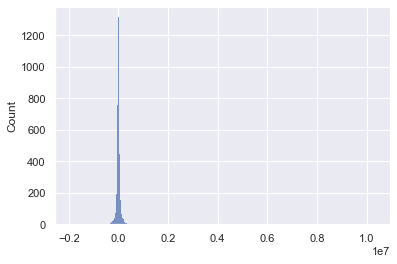

In [785]:
sns.histplot(model.resid)


In [786]:
normaltest(model.resid)

NormaltestResult(statistic=84293.92844424877, pvalue=0.0)

C:\Users\Samsung\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total Household Income'>

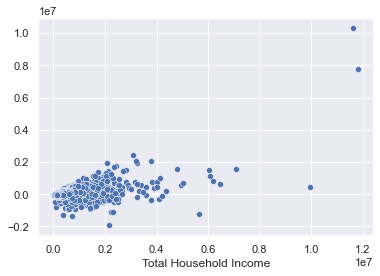

In [787]:
sns.scatterplot(y, model.resid)

In [788]:
mean_squared_error(y, y_pred)


15270747649.17365

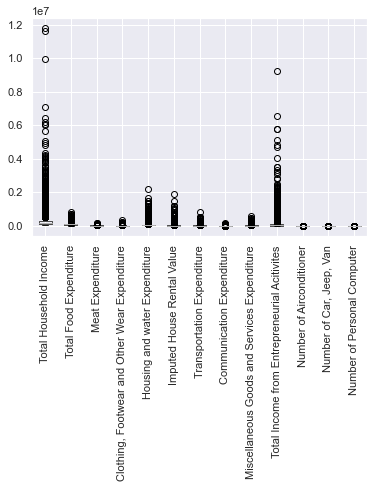

In [789]:
# Verificando a presença de outliers
df_fies_filipinas_high_corr.boxplot()
plt.xticks(rotation= 90);

In [790]:
# Criando uma lista com as colunas que possuem outliers e devem ser excluidos
columns_to_remove_outliers = ['Total Household Income', 'Total Food Expenditure', 'Meat Expenditure', 'Clothing, Footwear and Other Wear Expenditure',
                             'Housing and water Expenditure', 'Imputed House Rental Value','Transportation Expenditure', 'Communication Expenditure',
                             'Miscellaneous Goods and Services Expenditure', 'Total Income from Entrepreneurial Acitivites']
columns_to_remove_outliers

['Total Household Income',
 'Total Food Expenditure',
 'Meat Expenditure',
 'Clothing, Footwear and Other Wear Expenditure',
 'Housing and water Expenditure',
 'Imputed House Rental Value',
 'Transportation Expenditure',
 'Communication Expenditure',
 'Miscellaneous Goods and Services Expenditure',
 'Total Income from Entrepreneurial Acitivites']

In [791]:
# Eliminando os outliers - Função para verificar o limite inferior e superior
def calc_min_max_limit(dados_coluna):

    q1 = dados_coluna.quantile(0.25)
    q3 = dados_coluna.quantile(0.75)
    IQR = q3 - q1

    bottom_limit = max(q1 - (1.5 * IQR), dados_coluna.min())

    upper_limit = min(q3 + (1.5 * IQR), dados_coluna.max())

    return bottom_limit, upper_limit

In [792]:
df_fies_filipinas_high_corr_without_outliers = df_fies_filipinas_high_corr.copy()

# Eliminando os outliers

for coluna in columns_to_remove_outliers:
    bottom_limit, upper_limit = calc_min_max_limit(df_fies_filipinas_high_corr_without_outliers[coluna])
    
    # Filtro para pegar apenas as linhas cujos dados estão dentro do intervalo aceitável (não outliers)
    df_fies_filipinas_high_corr_without_outliers = df_fies_filipinas_high_corr_without_outliers[(df_fies_filipinas_high_corr_without_outliers[coluna] 
                                                   >= bottom_limit) & (df_fies_filipinas_high_corr_without_outliers[coluna] <= upper_limit)]

In [793]:
df_fies_filipinas_high_corr_without_outliers

,Total Household Income,Region,Total Food Expenditure,Main Source of Income,Meat Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Transportation Expenditure,Communication Expenditure,...,Type of Household,Type of Building/House,Type of Roof,Type of Walls,Tenure Status,Toilet Facilities,Main Source of Water Supply,Number of Airconditioner,"Number of Car, Jeep, Van",Number of Personal Computer
2,82785,CAR,61609,Wage/Salaries,7783,2735,14340,7200,324,420,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0
3,107589,CAR,78189,Wage/Salaries,10914,1390,16638,6600,6840,660,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Light,Own or owner-like possession of house and lot,Closed pit,"Own use, faucet, community water system",0,0,0
4,189322,CAR,94625,Wage/Salaries,18391,4620,31122,16800,6996,2100,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Quite Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,0
5,152883,CAR,73326,Wage/Salaries,15336,1930,22782,6600,4044,1500,...,Single Family,Single house,Mixed but predominantly strong materials,Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,0
6,198621,CAR,104644,Wage/Salaries,12968,7930,24126,12000,12696,1848,...,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,"Water-sealed, sewer septic tank, used exclusiv...","Own use, faucet, community water system",0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,130636,XII - SOCCSKSARGEN,81469,Wage/Salaries,4728,2289,30210,18000,14100,3600,...,Extended Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Rent-free house and lot with consent of owner,"Water-sealed, sewer septic tank, shared with o...","Shared, faucet, community water system",0,0,0
41539,119773,XII - SOCCSKSARGEN,44875,Enterpreneurial Activities,1476,1395,18372,12000,2124,600,...,Extended Family,Single house,Mixed but predominantly strong materials,Strong,Own or owner-like possession of house and lot,Open pit,"Own use, tubed/piped deep well",0,0,0
41540,137320,XII - SOCCSKSARGEN,31157,Enterpreneurial Activities,1886,3136,17640,10800,2568,1560,...,Single Family,Single house,"Strong material(galvanized,iron,al,tile,concre...",Strong,Own or owner-like possession of house and lot,Open pit,"Own use, tubed/piped deep well",0,0,0
41541,133171,XII - SOCCSKSARGEN,45882,Enterpreneurial Activities,480,2460,9240,4800,2040,1080,...,Single Family,Single house,"Light material (cogon,nipa,anahaw)",Strong,"Own house, rent-free lot with consent of owner",Open pit,"Own use, tubed/piped deep well",0,0,0


In [794]:
# Considerando apenas as variávies quantitativas
# Criando o modelo SEM outliers e SEM as variáveis categóricas
df_fies_filipinas_high_corr_without_outliers_num = df_fies_filipinas_high_corr_without_outliers.select_dtypes(include=np.number)

X = df_fies_filipinas_high_corr_without_outliers_num.drop(['Total Household Income'], axis=1)
y = df_fies_filipinas_high_corr_without_outliers_num['Total Household Income']

In [795]:
lr = LinearRegression().fit(X, y)

In [796]:
y_pred = lr.predict(X)

In [797]:
lr.score(X, y)

0.6013316608169519

In [798]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.601
Model:                                OLS   Adj. R-squared:                  0.601
Method:                     Least Squares   F-statistic:                     2448.
Date:                    Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                            18:02:42   Log-Likelihood:            -2.3118e+05
No. Observations:                   19487   AIC:                         4.624e+05
Df Residuals:                       19474   BIC:                         4.625e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                          1.299e+04    740.933     17.526      0.000    1.15e+04    1.44e+04
Total Food Expenditure                            0.7420      0.014     51.296      0.000       0.714       0.770
Meat Expenditure                                  1.0817      0.072     14.965      0.000       0.940       1.223
Clothing, Footwear and Other Wear Expenditure     2.0425      0.164     12.485      0.000       1.722       2.363
Housing and water Expenditure                     1.2360      0.048     25.763      0.000       1.142       1.330
Imputed House Rental Value                        0.1415      0.071      1.992      0.046       0.002       0.281
Transportation Expenditure                        1.7899      0.073     24.446      0.000       1.646       1.933
Communication Expenditure                         5.8731      0.349     16.809      0.000       5.188       6.558
Miscellaneous Goods and Services Expenditure      2.2166      0.117     19.010      0.000       1.988       2.445
Total Income from Entrepreneurial Acitivites      0.1864      0.007     27.412      0.000       0.173       0.200
Number of Airconditioner                       1.458e+04   2829.635      5.154      0.000    9036.914    2.01e+04
Number of Car, Jeep, Van                       2.005e+04   3936.652      5.094      0.000    1.23e+04    2.78e+04
Number of Personal Computer                    9891.0296   1238.075      7.989      0.000    7464.296    1.23e+04
==============================================================================
Omnibus:                     9380.189   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           108541.011
Skew:                           2.027   Prob(JB):                         0.00
Kurtosis:                      13.828   Cond. No.                     1.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [799]:
model.resid.mean()

4.6644985519818704e-11

<AxesSubplot:ylabel='Count'>

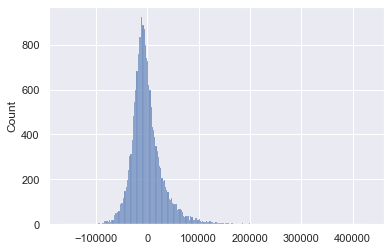

In [800]:
sns.histplot(model.resid)

C:\Users\Samsung\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total Household Income'>

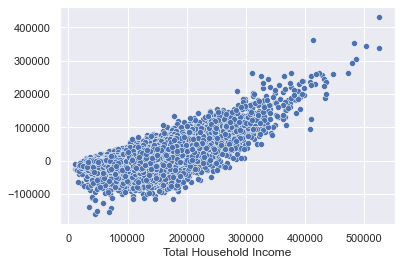

In [801]:
sns.scatterplot(y, model.resid)

In [802]:
mean_squared_error(y, y_pred)

1179696265.2899141

In [803]:
# Incluindo as variáveis categóricas
df_fies_filipinas_high_corr_without_outliers_dummies = pd.get_dummies(df_fies_filipinas_high_corr_without_outliers)
df_fies_filipinas_high_corr_without_outliers_dummies

,Total Household Income,Total Food Expenditure,Meat Expenditure,"Clothing, Footwear and Other Wear Expenditure",Housing and water Expenditure,Imputed House Rental Value,Transportation Expenditure,Communication Expenditure,Miscellaneous Goods and Services Expenditure,Total Income from Entrepreneurial Acitivites,...,"Main Source of Water Supply_Lake, river, rain and others",Main Source of Water Supply_Others,"Main Source of Water Supply_Own use, faucet, community water system","Main Source of Water Supply_Own use, tubed/piped deep well",Main Source of Water Supply_Peddler,"Main Source of Water Supply_Protected spring, river, stream, etc","Main Source of Water Supply_Shared, faucet, community water system","Main Source of Water Supply_Shared, tubed/piped deep well",Main Source of Water Supply_Tubed/piped shallow well,"Main Source of Water Supply_Unprotected spring, river, stream, etc"
2,82785,61609,7783,2735,14340,7200,324,420,6450,0,...,0,0,0,0,0,0,1,0,0,0
3,107589,78189,10914,1390,16638,6600,6840,660,3762,15580,...,0,0,1,0,0,0,0,0,0,0
4,189322,94625,18391,4620,31122,16800,6996,2100,8472,75687,...,0,0,1,0,0,0,0,0,0,0
5,152883,73326,15336,1930,22782,6600,4044,1500,5394,0,...,0,0,1,0,0,0,0,0,0,0
6,198621,104644,12968,7930,24126,12000,12696,1848,6126,72290,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41538,130636,81469,4728,2289,30210,18000,14100,3600,8064,0,...,0,0,0,0,0,0,1,0,0,0
41539,119773,44875,1476,1395,18372,12000,2124,600,3978,94120,...,0,0,0,1,0,0,0,0,0,0
41540,137320,31157,1886,3136,17640,10800,2568,1560,6090,78270,...,0,0,0,1,0,0,0,0,0,0
41541,133171,45882,480,2460,9240,4800,2040,1080,3570,98545,...,0,0,0,1,0,0,0,0,0,0


In [804]:
# Criando o modelo SEM os outliers - Com as variáveis categóricas
X = df_fies_filipinas_high_corr_without_outliers_dummies.drop('Total Household Income', axis=1)
y = df_fies_filipinas_high_corr_without_outliers_dummies['Total Household Income']

In [805]:
lr = LinearRegression().fit(X, y)

In [806]:
y_pred = lr.predict(X)

In [807]:
lr.score(X, y)

0.6794824767250354

In [808]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.679
Model:                                OLS   Adj. R-squared:                  0.673
Method:                     Least Squares   F-statistic:                     109.8
Date:                    Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                            18:02:49   Log-Likelihood:            -2.2905e+05
No. Observations:                   19487   AIC:                         4.588e+05
Df Residuals:                       19117   BIC:                         4.618e+05
Df Model:                             369                                         
Covariance Type:                nonrobust                                         
=======================================================================================================================================================================================================================================================================
                                                                                                                                                                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Total Food Expenditure                                                                                                                                                                                  0.6604      0.014     45.613      0.000       0.632       0.689
Meat Expenditure                                                                                                                                                                                        0.4689      0.075      6.282      0.000       0.323       0.615
Clothing, Footwear and Other Wear Expenditure                                                                                                                                                           1.7021      0.153     11.118      0.000       1.402       2.002
Housing and water Expenditure                                                                                                                                                                           1.1380      0.053     21.601      0.000       1.035       1.241
Imputed House Rental Value                                                                                                                                                                              0.1135      0.079      1.445      0.149      -0.040       0.267
Transportation Expenditure                                                                                                                                                                              1.3889      0.069     20.256      0.000       1.255       1.523
Communication Expenditure                                                                                                                                                                               5.2940      0.326     16.237      0.000       4.655       5.933
Miscellaneous Goods and Services Expenditure                                                                                                                                                            1.9866      0.111     17.937      0.000       1.770       2.204
Total Income from Entrepreneurial Acitivites                                                                                           

In [809]:
mean_squared_error(y, y_pred)

948440816.6002831

In [810]:
# Criando uma lista apenas com os p_values maior que 0.05
list_pvalue_less = model.pvalues[model.pvalues > 0.05] 
list_pvalue_less = list_pvalue_less.index.tolist() 
list_pvalue_less

['Imputed House Rental Value',
 'Region_Caraga',
 'Region_NCR',
 'Region_VI - Western Visayas',
 'Region_VIII - Eastern Visayas',
 'Household Head Marital Status_Annulled',
 'Household Head Marital Status_Divorced/Separated',
 'Household Head Marital Status_Married',
 'Household Head Marital Status_Single',
 'Household Head Highest Grade Completed_Agriculture, Forestry, and Fishery Programs',
 'Household Head Highest Grade Completed_Architecture and Building Programs',
 'Household Head Highest Grade Completed_Arts Programs',
 'Household Head Highest Grade Completed_Business and Administration Programs',
 'Household Head Highest Grade Completed_Computing/Information Technology Programs',
 'Household Head Highest Grade Completed_Engineering and Engineering Trades Programs',
 'Household Head Highest Grade Completed_Environmental Protection Programs',
 'Household Head Highest Grade Completed_First Year Post Secondary',
 'Household Head Highest Grade Completed_Health Programs',
 'Household 

In [811]:
# Criando modelo SEM outliers - Com as variáveis categóricas - excluindo do modelo as variáveis com p_value menor 0.05
X = df_fies_filipinas_high_corr_without_outliers_dummies.drop(list_pvalue_less, axis=1).drop('Total Household Income', axis=1)
y = df_fies_filipinas_high_corr_without_outliers_dummies['Total Household Income']

In [812]:
lr = LinearRegression().fit(X, y)

In [813]:
y_pred = lr.predict(X)

In [814]:
lr.score(X, y)

0.6748981995091473

In [815]:
x = sm.add_constant(X)

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Total Household Income   R-squared:                       0.675
Model:                                OLS   Adj. R-squared:                  0.673
Method:                     Least Squares   F-statistic:                     349.7
Date:                    Wed, 22 Dec 2021   Prob (F-statistic):               0.00
Time:                            18:02:51   Log-Likelihood:            -2.2919e+05
No. Observations:                   19487   AIC:                         4.586e+05
Df Residuals:                       19371   BIC:                         4.595e+05
Df Model:                             115                                         
Covariance Type:                nonrobust                                         
=================================================================================================================================================================================
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Total Food Expenditure                                                                                            0.6691      0.014     47.357      0.000       0.641       0.697
Meat Expenditure                                                                                                  0.4843      0.074      6.580      0.000       0.340       0.629
Clothing, Footwear and Other Wear Expenditure                                                                     1.7303      0.151     11.467      0.000       1.435       2.026
Housing and water Expenditure                                                                                     1.2060      0.033     36.551      0.000       1.141       1.271
Transportation Expenditure                                                                                        1.4059      0.068     20.738      0.000       1.273       1.539
Communication Expenditure                                                                                         5.2650      0.322     16.341      0.000       4.633       5.897
Miscellaneous Goods and Services Expenditure                                                                      2.0247      0.109     18.642      0.000       1.812       2.238
Total Income from Entrepreneurial Acitivites                                                                      0.6110      0.011     57.170      0.000       0.590       0.632
Number of Airconditioner                                                                                       1.251e+04   2579.879      4.847      0.000    7448.693    1.76e+04
Number of Car, Jeep, Van                                                                                       1.782e+04   3582.011      4.974      0.000    1.08e+04    2.48e+04
Number of Personal Computer                                                                                    7614.8200   1138.688      6.687      0.000    5382.893    9846.747
Region_ ARMM                                                                                                  -7439.5932   1034.492     -7.192      0.000   -9467.287   -5411.900
Region_CAR                                                                                                     6833.1678   1330.306      5.137      0.000    4225.653    9440.682
Region_I - Ilocos Region                                                                                       3561.0379   1115.267      3.193      0.001    1375.017    5747.059
Region_II - C

In [816]:
mean_squared_error(y, y_pred)

962006114.3154691

In [817]:
model.resid.mean()

2.749037276088424e-09

<AxesSubplot:ylabel='Count'>

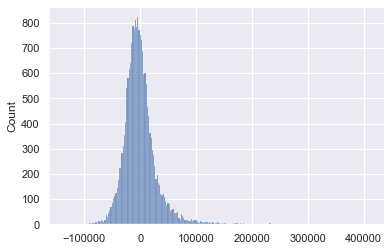

In [818]:
sns.histplot(model.resid)

C:\Users\Samsung\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Total Household Income'>

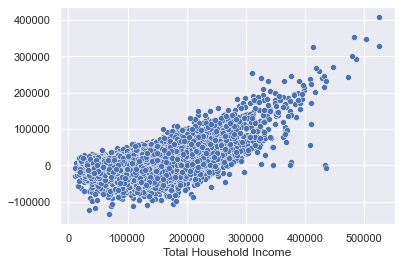

In [819]:
sns.scatterplot(y, model.resid)

##### Considerando 70% dos dados para treinar o modelo, e 30% para testá-lo

### Utilizando o primeiro modelo  - COM outliers - SEM as variáveis categóricas
### R-squared:	0.806 e mean_squared_error 15944259972.7

In [820]:
# Criando o modelo para a regressão linear - COM OUTLIERS - SEM AS VARIÁVEIS CATEGÓRICAS

X = df_fies_filipinas_high_corr_only_columns_num.drop('Total Household Income', axis=1)
y = df_fies_filipinas_high_corr_only_columns_num['Total Household Income']

In [821]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [822]:
lr = LinearRegression().fit(X_train, y_train)

In [823]:
y_pred = lr.predict(X_test)

In [824]:
r2_score(y_test, y_pred)

0.7898057328894197

In [825]:
lr.score(X_train, y_train)

0.8246631553848031